# Basic imports

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('test/df_all_small.tsv', sep='\t')
learning_df = pd.read_csv('test/learning_df.tsv', sep='\t')
X_learning = learning_df.drop(['virus', 'host', 'group', 'group_code', 'y'], axis=1).to_numpy()
y_learning = learning_df['y'].to_numpy()
groups = learning_df['group_code'].to_numpy()

In [3]:
from joblib import load
res = load('test/results_small.joblib')

# Create Pipeline and GridSearchCV

Define params

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=1)
params = {
    'max_depth':[2, 4, 6, 8, 10], 
}
logo = LeaveOneGroupOut()


Perform GridSearch

In [48]:

clf2 = GridSearchCV(rfc, params, cv=logo, scoring='f1', n_jobs=-1, verbose=3)
clf2.fit(X_learning, y_learning, groups=groups)


Fitting 48 folds for each of 5 candidates, totalling 240 fits


GridSearchCV(cv=LeaveOneGroupOut(),
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=200,
                                              random_state=1),
             n_jobs=-1, param_grid={'max_depth': [2, 4, 6, 8, 10]},
             scoring='f1', verbose=3)

Save the results to file

In [9]:
'''
from joblib import dump
dump(clf, 'test/clf.joblib')
'''

['test/clf.joblib']

## Examine the results

In [8]:
from joblib import load
clf = load('test/clf.joblib')

In [9]:
clf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       random_state=1)

In [13]:
clf.best_score_

0.6089659670541102

In [14]:
clf.best_params_

{'max_depth': 10, 'n_estimators': 200}

In [15]:
clf.scorer_

make_scorer(f1_score, average=binary)

In [16]:
clf.n_splits_

48

### Visualise the results

Define function

In [37]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        color = next(ax._get_lines.prop_cycler)['color']
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val), color=color)
        # add sd visualisation
        #ax.fill_between(grid_param_1, scores_mean[idx,:]-scores_sd[idx,:], \
        # scores_mean[idx,:]+scores_sd[idx,:], alpha=0.3, facecolor=color)

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')
    return

Visualise

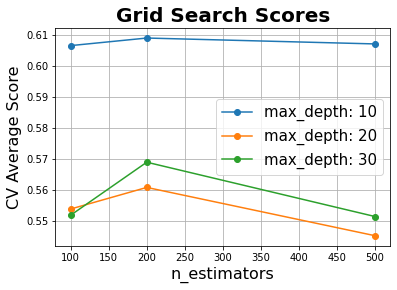

In [38]:
plot_grid_search(clf.cv_results_, params['n_estimators'], params['max_depth'], 'n_estimators', 'max_depth')

# New results

In [44]:
clf2.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=200,
                       random_state=1)

In [45]:
def plot_grid_search_one_param(cv_results, grid_param_1, name_param_1):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean)

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd)

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    ax.bar(grid_param_1, scores_mean, yerr=scores_sd)

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')
    return

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


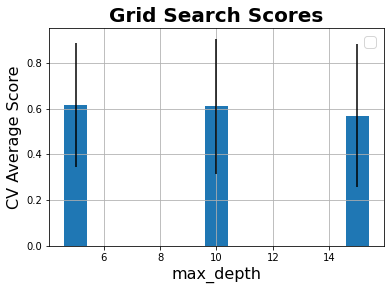

In [46]:
plot_grid_search_one_param(clf2.cv_results_, params['max_depth'], 'max_depth')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


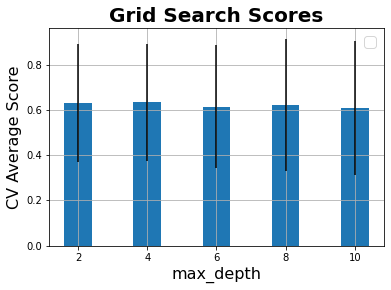

In [49]:
plot_grid_search_one_param(clf2.cv_results_, params['max_depth'], 'max_depth')

In [50]:
clf2.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=200,
                       random_state=1)